In [5]:
import yfinance as yf

g_df = yf.download('GLD', start='2015-01-01')
s_df = yf.download('GDX', start='2015-01-01')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [6]:
g_df = g_df.reset_index()
s_df = s_df.reset_index()

In [7]:
import numpy as np

g_df = g_df.rename(columns={'Date': 'ds', 'Adj Close' : 'y'})
s_df = s_df.rename(columns={'Date': 'ds', 'Adj Close' : 'y'})

In [8]:
g_train_df = g_df.iloc[:int(len(g_df) * 0.8)]
s_train_df = s_df.iloc[:int(len(s_df) * 0.8)]

In [9]:
import numpy as np

def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [17]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import itertools
import pandas as pd
import matplotlib.pyplot as plt

# changepoint_prior_scale: trend의 변화하는 크기를 반영하는 정도이다, 0.05가 default
# seasonality_prior_scale: 계절성을 반영하는 단위이다.
# seasonality_mode: 계절성으로 나타나는 효과를 더해 나갈지, 곱해 나갈지 정한다.
search_space = {
    'changepoint_prior_scale': [0.05, 0.1, 0.5, 1.0, 5.0, 10.0],
    'seasonality_prior_scale': [0.05, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative']
}

# itertools.product(): 각 요소들의 모든 경우의 수 조합으로 생성
param_combinded = [dict(zip(search_space.keys(), v)) for v in itertools.product(*search_space.values())]

train_len = int(len(g_df) * 0.8)
test_len = int(len(g_df) * 0.2)

train_size = f'{train_len} days'
test_size = f'{test_len} days'
train_df = g_df.iloc[: train_len]
test_df = g_df.iloc[train_len: ]

mapes = []
for param in param_combinded:
    model = Prophet(**param)
    model.fit(train_df)

    # 'threads' 옵션은 메모리 사용량은 낮지만 CPU 바운드 작업에는 효과적이지 않을 수 있다.
    # 'dask' 옵션은 대규모의 데이터를 처리하는 데 효과적이다.
    # 'processes' 옵션은 각각의 작업을 별도의 프로세스로 실행하기 때문에 CPU 바운드 작업에 효과적이지만,
    # 메모리 사용량이 높을 수 있다.
    cv_df = cross_validation(model, initial=train_size, period='20 days', horizon=test_size, parallel='processes')
    df_p = performance_metrics(cv_df, rolling_window=1)
    mapes.append(df_p['mape'].values[0])

tuning_result = pd.DataFrame(param_combinded)
tuning_result['mape'] = mapes       

17:01:25 - cmdstanpy - INFO - Chain [1] start processing
17:01:25 - cmdstanpy - INFO - Chain [1] done processing
17:01:35 - cmdstanpy - INFO - Chain [1] start processing
17:01:36 - cmdstanpy - INFO - Chain [1] done processing
17:01:48 - cmdstanpy - INFO - Chain [1] start processing
17:01:49 - cmdstanpy - INFO - Chain [1] done processing
17:02:02 - cmdstanpy - INFO - Chain [1] start processing
17:02:03 - cmdstanpy - INFO - Chain [1] done processing
17:02:14 - cmdstanpy - INFO - Chain [1] start processing
17:02:14 - cmdstanpy - INFO - Chain [1] done processing
17:02:26 - cmdstanpy - INFO - Chain [1] start processing
17:02:28 - cmdstanpy - INFO - Chain [1] done processing
17:02:52 - cmdstanpy - INFO - Chain [1] start processing
17:02:53 - cmdstanpy - INFO - Chain [1] done processing
17:03:05 - cmdstanpy - INFO - Chain [1] start processing
17:03:07 - cmdstanpy - INFO - Chain [1] done processing
17:03:33 - cmdstanpy - INFO - Chain [1] start processing
17:03:34 - cmdstanpy - INFO - Chain [1]

NameError: name 'pd' is not defined

In [22]:
import pandas as pd

tuning_result = pd.DataFrame(param_combinded)
tuning_result['mape'] = mapes       

In [23]:
tuning_result.sort_values(by='mape')

,changepoint_prior_scale,seasonality_prior_scale,seasonality_mode,mape
39,5.00,10.00,multiplicative,0.160426
29,1.00,1.00,multiplicative,0.160432
41,10.00,0.05,multiplicative,0.160471
47,10.00,10.00,multiplicative,0.160480
37,5.00,1.00,multiplicative,0.160489
25,1.00,0.05,multiplicative,0.160489
19,0.50,0.10,multiplicative,0.160493
35,5.00,0.10,multiplicative,0.160507
45,10.00,1.00,multiplicative,0.160507
43,10.00,0.10,multiplicative,0.160516


In [10]:
# 일단 여기 값 위에꺼 보고 수정해야 합니다.
# 10.00	0.10	additive	
model = Prophet(changepoint_prior_scale=10, 
                seasonality_prior_scale=0.1, 
                seasonality_mode='additive')
model.fit(g_df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
# 뒤에 일정 조절해서 오늘 날짜랑 비교해봅시다.
# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][1370:]

00:26:20 - cmdstanpy - INFO - Chain [1] start processing
00:26:21 - cmdstanpy - INFO - Chain [1] done processing


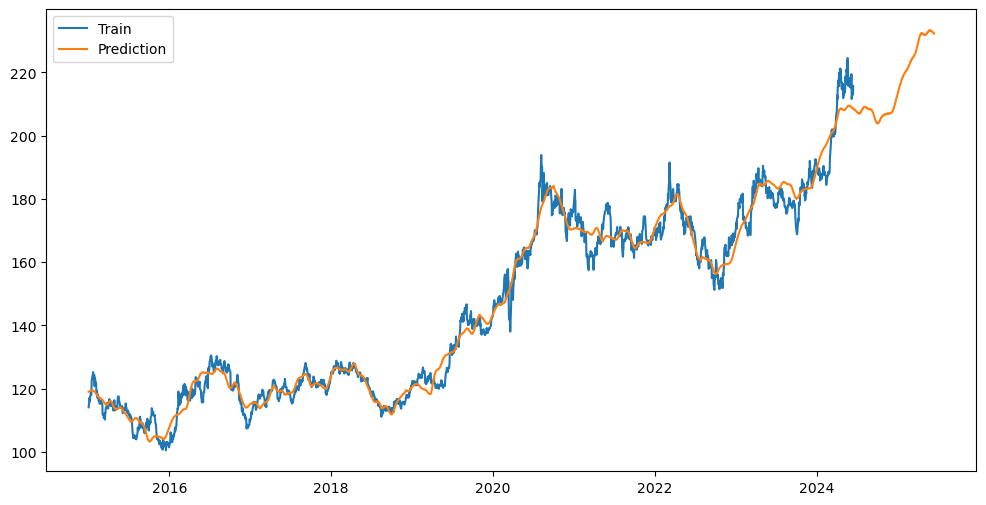

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
plt.plot(b_df[['y']], label='Train')
plt.plot(forecast_df[['yhat']], label='Prediction')
plt.legend()
plt.show()

C:\Users\HANSUNG\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\HANSUNG\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


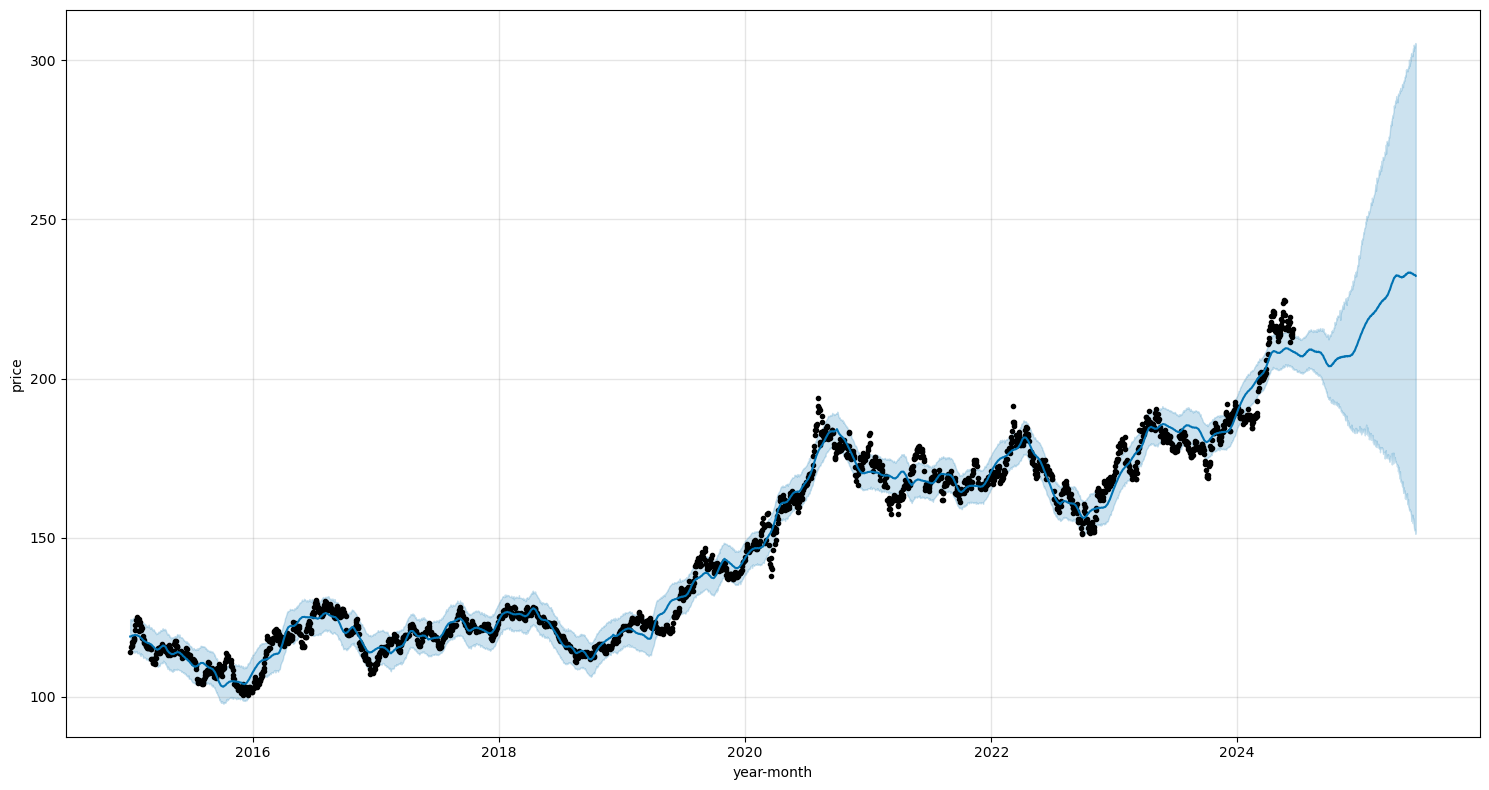

In [29]:
model.plot(forecast, figsize=(15, 8), xlabel='year-month', ylabel='price')
plt.show()

In [53]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import itertools

# changepoint_prior_scale: trend의 변화하는 크기를 반영하는 정도이다, 0.05가 default
# seasonality_prior_scale: 계절성을 반영하는 단위이다.
# seasonality_mode: 계절성으로 나타나는 효과를 더해 나갈지, 곱해 나갈지 정한다.
search_space = {
    'changepoint_prior_scale': [0.05, 0.1, 0.5, 1.0, 5.0, 10.0],
    'seasonality_prior_scale': [0.05, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative']
}

# itertools.product(): 각 요소들의 모든 경우의 수 조합으로 생성
param_combinded = [dict(zip(search_space.keys(), v)) for v in itertools.product(*search_space.values())]

s_train_len = int(len(s_df) * 0.8)
s_test_len = int(len(s_df) * 0.2)

s_train_size = f'{s_train_len} days'
s_test_size = f'{s_test_len} days'
s_train_df = s_df.iloc[: s_train_len]
s_test_df = s_df.iloc[s_train_len: ]

s_mapes = []
for param in param_combinded:
    s_model = Prophet(**param)
    s_model.fit(s_train_df)

    # 'threads' 옵션은 메모리 사용량은 낮지만 CPU 바운드 작업에는 효과적이지 않을 수 있다.
    # 'dask' 옵션은 대규모의 데이터를 처리하는 데 효과적이다.
    # 'processes' 옵션은 각각의 작업을 별도의 프로세스로 실행하기 때문에 CPU 바운드 작업에 효과적이지만,
    # 메모리 사용량이 높을 수 있다.
    s_cv_df = cross_validation(s_model, initial=s_train_size, period='20 days', horizon=s_test_size, parallel='processes')
    s_df_p = performance_metrics(s_cv_df, rolling_window=1)
    s_mapes.append(s_df_p['mape'].values[0])

s_tuning_result = pd.DataFrame(param_combinded)
s_tuning_result['s_mape'] = s_mapes       

17:33:49 - cmdstanpy - INFO - Chain [1] start processing
17:33:50 - cmdstanpy - INFO - Chain [1] done processing
17:33:59 - cmdstanpy - INFO - Chain [1] start processing
17:33:59 - cmdstanpy - INFO - Chain [1] done processing
17:34:08 - cmdstanpy - INFO - Chain [1] start processing
17:34:08 - cmdstanpy - INFO - Chain [1] done processing
17:34:16 - cmdstanpy - INFO - Chain [1] start processing
17:34:17 - cmdstanpy - INFO - Chain [1] done processing
17:34:26 - cmdstanpy - INFO - Chain [1] start processing
17:34:27 - cmdstanpy - INFO - Chain [1] done processing
17:34:35 - cmdstanpy - INFO - Chain [1] start processing
17:34:37 - cmdstanpy - INFO - Chain [1] done processing
17:34:55 - cmdstanpy - INFO - Chain [1] start processing
17:34:55 - cmdstanpy - INFO - Chain [1] done processing
17:35:04 - cmdstanpy - INFO - Chain [1] start processing
17:35:06 - cmdstanpy - INFO - Chain [1] done processing
17:35:31 - cmdstanpy - INFO - Chain [1] start processing
17:35:32 - cmdstanpy - INFO - Chain [1]

In [54]:
s_tuning_result.sort_values(by='s_mape')

,changepoint_prior_scale,seasonality_prior_scale,seasonality_mode,s_mape
9,0.10,0.05,multiplicative,0.272913
11,0.10,0.10,multiplicative,0.273816
3,0.05,0.10,multiplicative,0.276330
5,0.05,1.00,multiplicative,0.277530
1,0.05,0.05,multiplicative,0.278749
7,0.05,10.00,multiplicative,0.278918
17,0.50,0.05,multiplicative,0.279002
13,0.10,1.00,multiplicative,0.279586
19,0.50,0.10,multiplicative,0.279755
10,0.10,0.10,additive,0.279942


In [25]:
# 일단 여기 값 위에꺼 보고 수정해야 합니다.
#0.10	0.10	additive
s_model = Prophet(changepoint_prior_scale=10, 
                seasonality_prior_scale=0.1, 
                seasonality_mode='additive')
s_model.fit(s_df)
s_future = s_model.make_future_dataframe(periods=365)
s_forecast = s_model.predict(s_future)
# 뒤에 일정 조절해서 오늘 날짜랑 비교해봅시다.
# s_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][1370:]

00:30:54 - cmdstanpy - INFO - Chain [1] start processing
00:30:55 - cmdstanpy - INFO - Chain [1] done processing


C:\Users\HANSUNG\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\HANSUNG\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


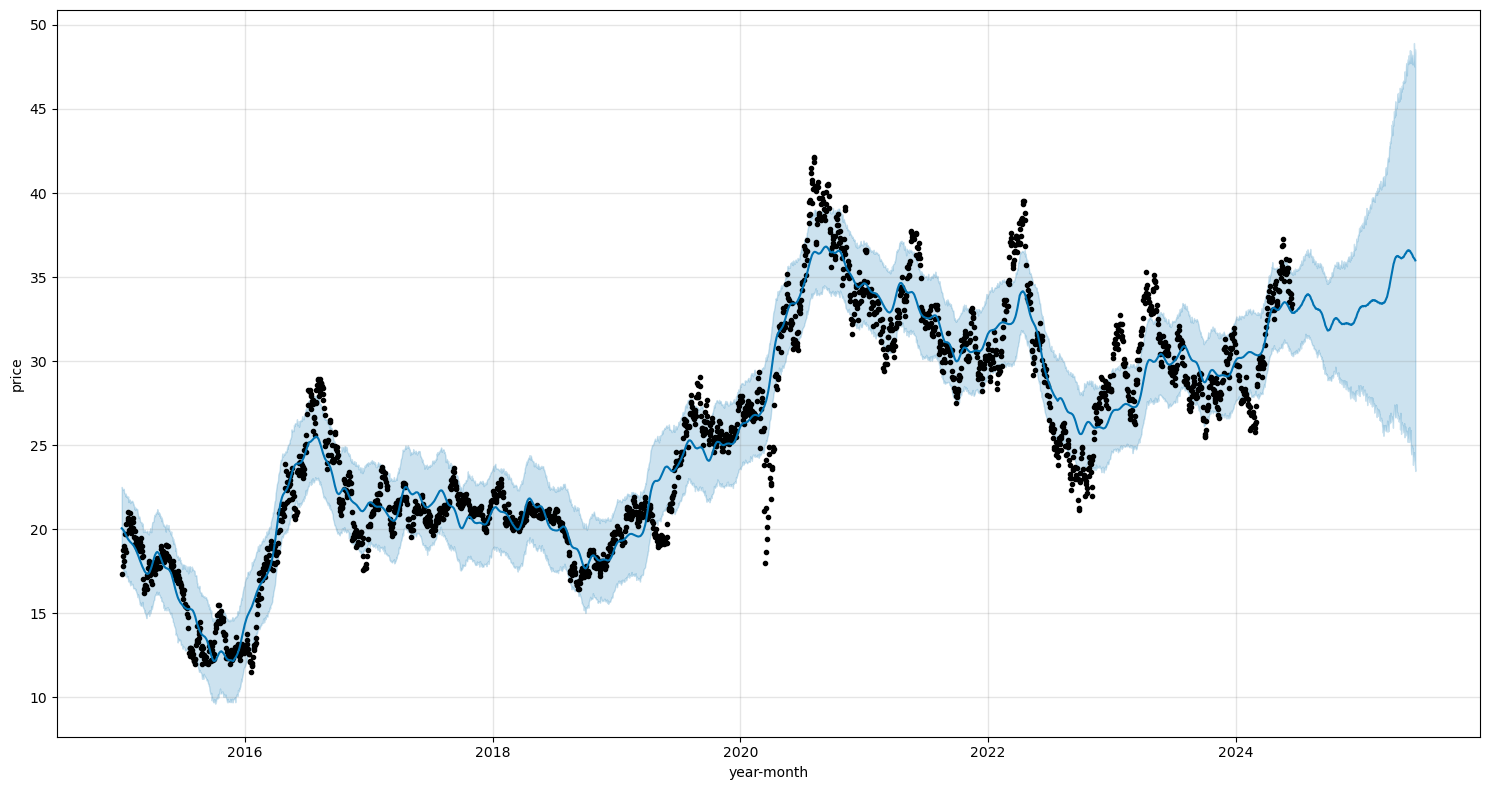

In [56]:
s_model.plot(s_forecast, figsize=(15, 8), xlabel='year-month', ylabel='price')
plt.show()

In [25]:
b_df = g_df.copy()
b_df.set_index('ds', inplace=True)

forecast_df = forecast.copy()
forecast_df = forecast_df.set_index('ds')

b_df.index = pd.to_datetime(b_df.index)
forecast_df.index = pd.to_datetime(forecast_df.index)

# 여기는 위에서 로그 씌워서 여기는 지수 씌워줌
# b_df = b_df.apply(np.exp)
# forecast_df = forecast_df.apply(np.exp)

In [26]:
sb_df = s_df.copy()
sb_df.set_index('ds', inplace=True)

s_forecast_df = s_forecast.copy()
s_forecast_df = s_forecast_df.set_index('ds')

sb_df.index = pd.to_datetime(sb_df.index)
s_forecast_df.index = pd.to_datetime(s_forecast_df.index)

# 여기는 위에서 로그 씌워서 여기는 지수 씌워줌
# b_df = b_df.apply(np.exp)
# forecast_df = forecast_df.apply(np.exp)

C:\Users\HANSUNG\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\HANSUNG\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


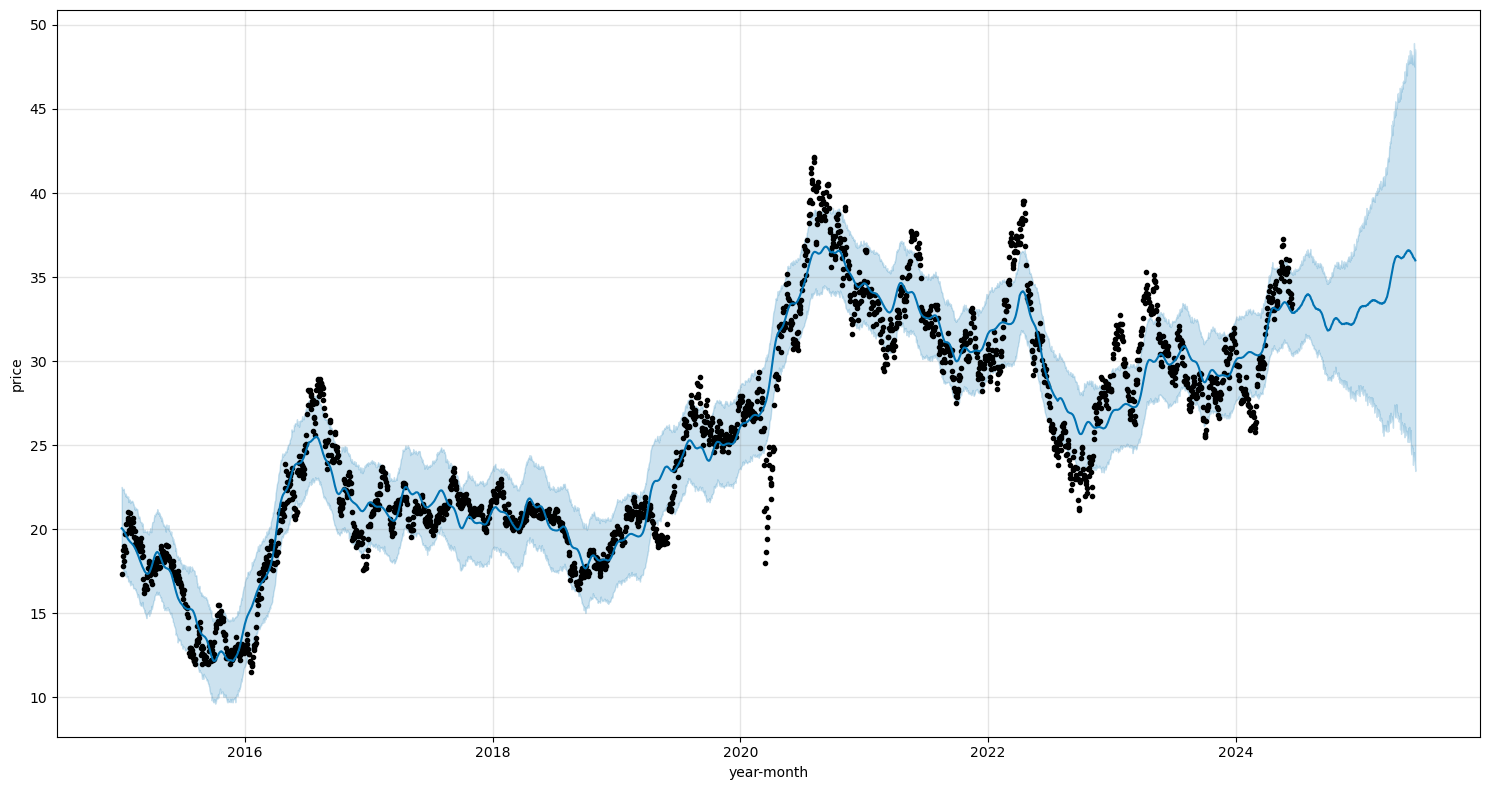

In [58]:
s_model.plot(s_forecast, figsize=(15, 8), xlabel='year-month', ylabel='price')
plt.show()

In [59]:
import pandas as pd

# 'ds' 컬럼을 날짜 타입으로 변환합니다. (필요하다면)
# forecast['ds'] = pd.to_datetime(forecast['ds'])

# # 'ds' 컬럼을 인덱스로 설정합니다.
# forecast.set_index('ds', inplace=True)

# 2024년 6월 1일 이후 데이터만 선택합니다.
g_list_df = forecast.loc['2024-06-01':, ['yhat']]
s_list_df = s_forecast_df.loc['2024-06-01':, ['yhat']]

In [49]:
g_list_df = g_list_df / g_list_df.shift(1)
g_list_df = g_list_df.dropna()
g_list_df

,yhat
ds,
2024-06-04,0.999830
2024-06-05,0.999835
2024-06-06,0.999867
2024-06-07,0.999776
2024-06-10,0.998560
...,...
2025-06-10,0.999855
2025-06-11,0.999878
2025-06-12,0.999921


In [60]:
s_list_df = s_list_df / s_list_df.shift(1)
s_list_df = s_list_df.dropna()
s_list_df

,yhat
ds,
2024-06-04,0.998845
2024-06-05,0.998700
2024-06-06,0.998891
2024-06-07,0.998943
2024-06-10,0.996391
...,...
2025-06-10,0.999056
2025-06-11,0.999027
2025-06-12,0.999299


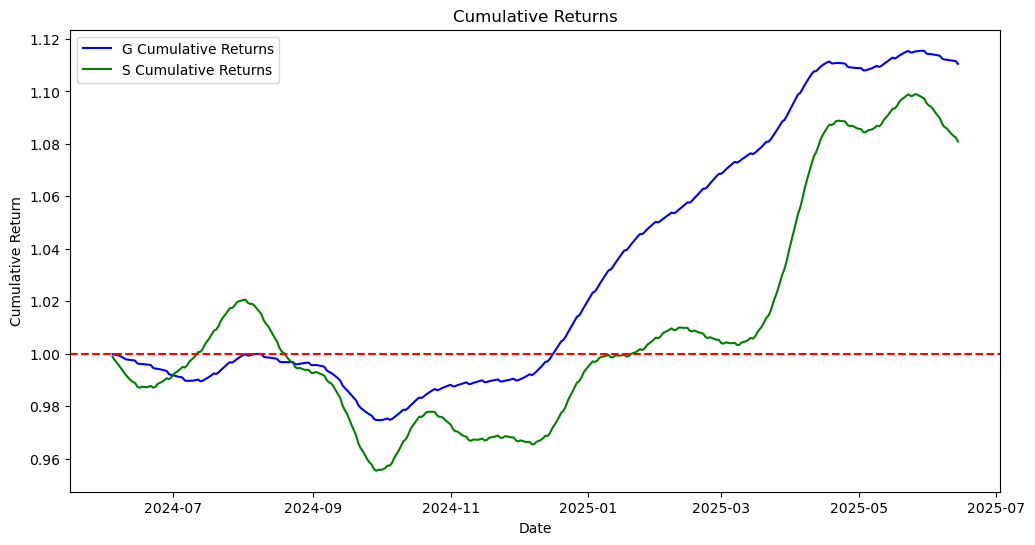

In [61]:
g_cumulative_returns = g_list_df.cumprod()
s_cumulative_returns = s_list_df.cumprod()
# 결과 플롯
plt.figure(figsize=(12, 6))
plt.plot(g_cumulative_returns, label='G Cumulative Returns', color='blue')
plt.plot(s_cumulative_returns, label='S Cumulative Returns', color='green')
plt.axhline(y=1, color='r', linestyle='--')  # y=1에 수평선 추가
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()  # 범례 추가
plt.show()

In [51]:
a

,yhat,min,mean,std,median,max
ds,,,,,,
2015-01-30,19.229509,19.229509,19.412016,0.134624,19.435138,19.583282
2015-02-02,19.213630,19.213630,19.395467,0.137773,19.382839,19.583282
2015-02-03,19.196912,19.196912,19.376148,0.137138,19.332186,19.577353
2015-02-04,19.184987,19.184987,19.356530,0.134886,19.315629,19.573340
2015-02-05,19.174103,19.174103,19.336568,0.130585,19.301313,19.568071
...,...,...,...,...,...,...
2025-06-13,35.963265,35.963265,36.393784,0.256728,36.418167,36.732194
2025-06-14,35.937162,35.937162,36.354032,0.263045,36.368371,36.717495
2025-06-15,35.903861,35.903861,36.313350,0.266765,36.318105,36.693589


In [44]:
a = s_forecast_df[['yhat']]

In [46]:
# Create a copy of the DataFrame if 'a' is a slice from another DataFrame
a = a.copy()

# Use .loc to avoid SettingWithCopyWarning
window = 20
a.loc[:, 'min'] = a['yhat'].rolling(window=window).min()
a.loc[:, 'mean'] = a['yhat'].rolling(window=window).mean()
a.loc[:, 'std'] = a['yhat'].rolling(window=window).std()
a.loc[:, 'median'] = a['yhat'].rolling(window=window).median()
a.loc[:, 'max'] = a['yhat'].rolling(window=window).max()

# Drop rows with NaN values if needed
a.dropna(inplace=True)


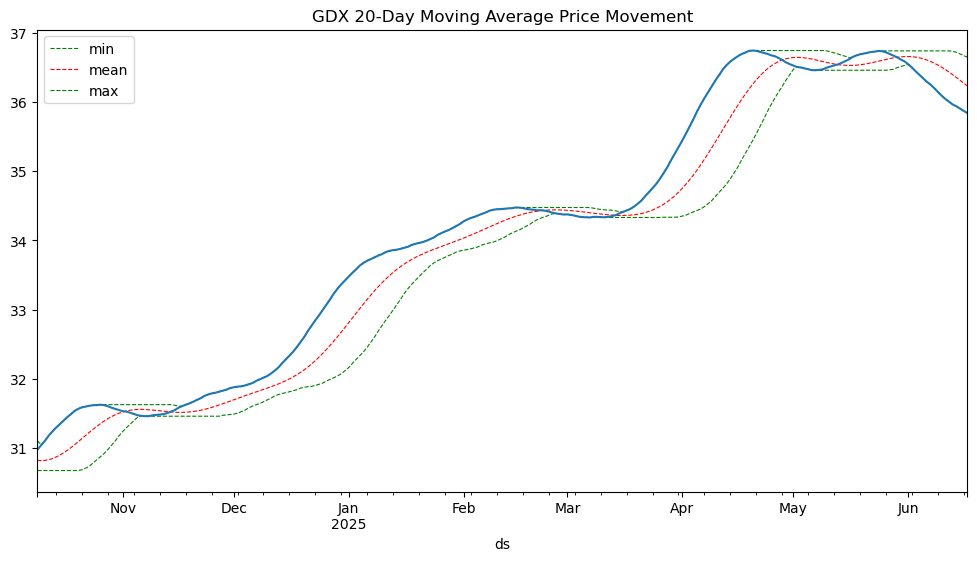

In [50]:
import matplotlib.pyplot as plt

ax = a[['min', 'mean', 'max']].iloc[-252:].plot(figsize=(12, 6), style=['g--', 'r--', 'g--'], lw=0.8)
a['yhat'].iloc[-252:].plot(ax=ax)
plt.title("GDX 20-Day Moving Average Price Movement")
plt.show()

In [52]:
# SMA(Simple Moving Average): 일정 기간동안의 가격의 평균을 나타내는 보조지표
# 1달 영업일을 21일로 가정, 1년 영업일을 252일로 가정

a['SMA1'] = a['yhat'].rolling(window=21).mean() #short-term
a['SMA2'] = a['yhat'].rolling(window=252).mean() #long-term
a[['yhat', 'SMA1', 'SMA2']].tail()

,yhat,SMA1,SMA2
ds,,,
2025-06-13,35.963265,36.410159,34.065995
2025-06-14,35.937162,36.372040,34.086442
2025-06-15,35.903861,36.332595,34.106584
2025-06-16,35.870389,36.292257,34.126411
2025-06-17,35.836814,36.251458,34.145918


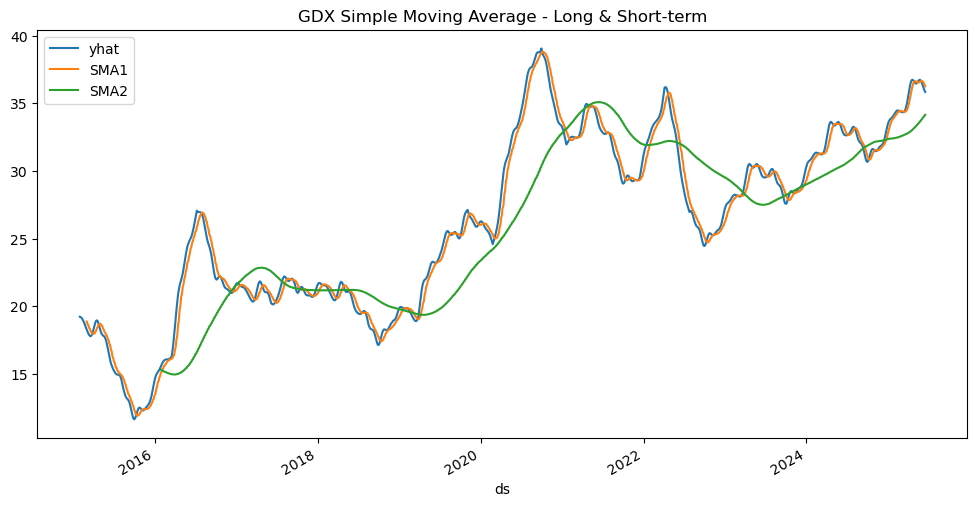

In [53]:
a[['yhat', 'SMA1', 'SMA2']].plot(figsize=(12, 6))
plt.title("GDX Simple Moving Average - Long & Short-term")
plt.show()

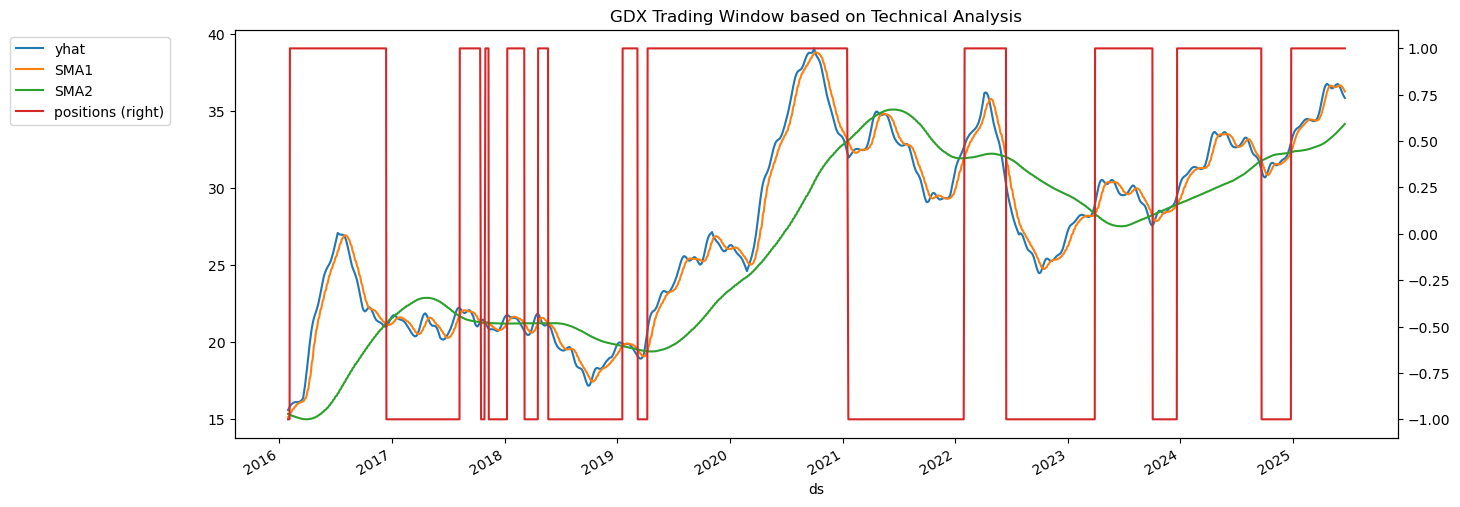

In [54]:
# 아마존 주가 기술 분석
# 골든 크로스, 데드 크로스
a.dropna(inplace=True)

a['positions'] = np.where(a['SMA1'] > a['SMA2'], 1, -1)  # 1: buy , -1: sell /

ax = a[['yhat', 'SMA1', 'SMA2', 'positions']].plot(figsize=(15, 6), secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((-0.05, 1))

plt.title("GDX Trading Window based on Technical Analysis")
plt.show()

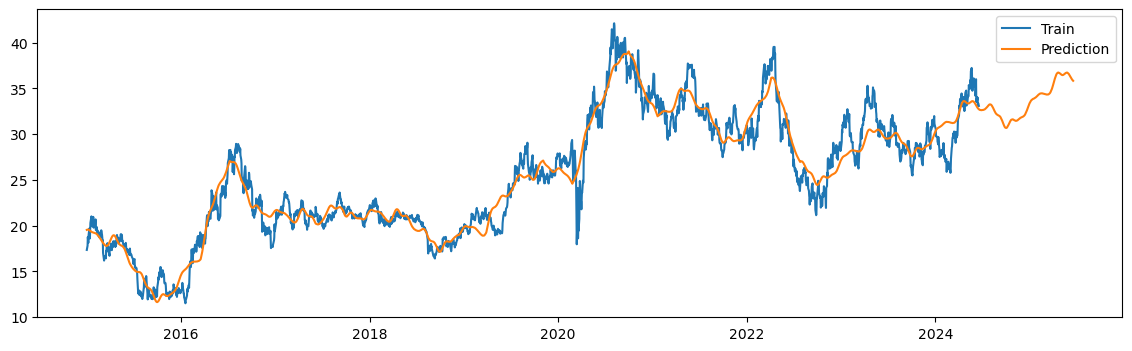

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(14, 4))
plt.plot(sb_df[['y']], label='Train')
plt.plot(s_forecast_df[['yhat']], label='Prediction')
plt.legend()
plt.show()

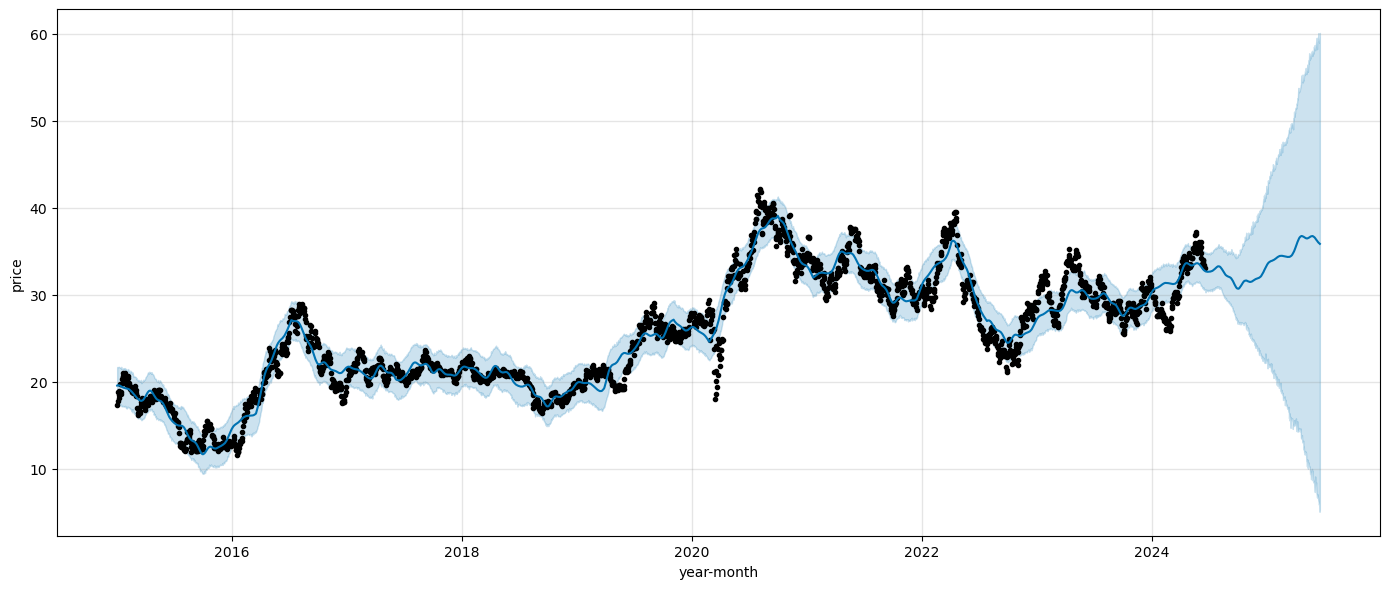

In [35]:
s_model.plot(s_forecast, figsize=(14, 6), xlabel='year-month', ylabel='price')
plt.show()

C:\Users\HANSUNG\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\HANSUNG\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\HANSUNG\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime obje

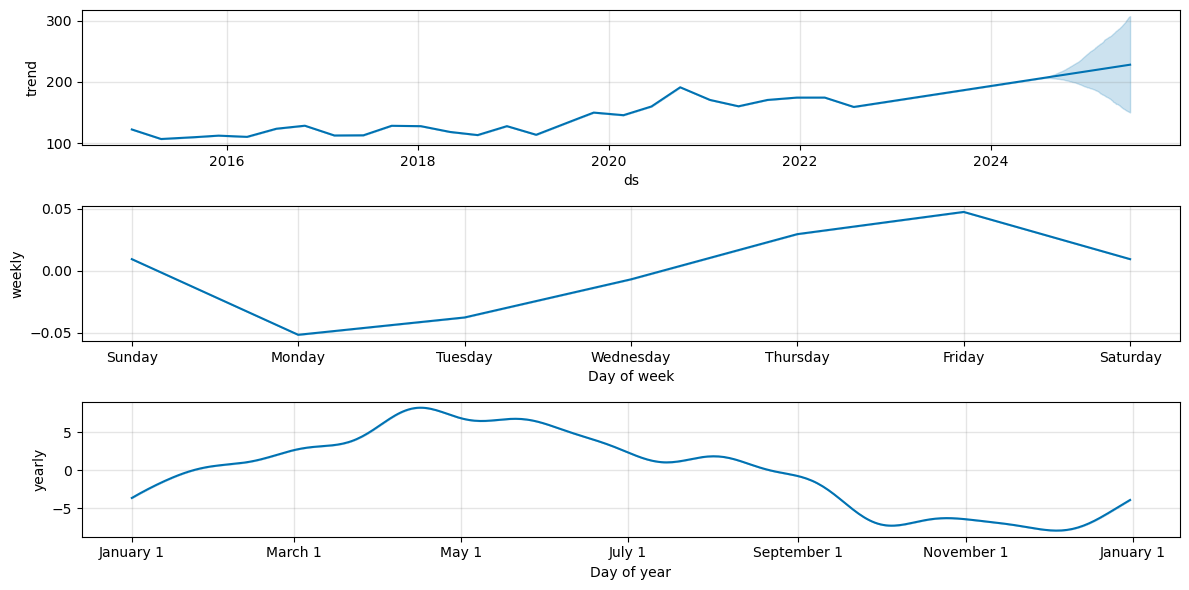

In [37]:
import matplotlib.pyplot as plt
model.plot_components(forecast, figsize=(12, 6))
plt.show()

In [20]:
from prophet import Prophet
import pandas as pd